#ExtraaLearn Project



## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

# Importing necessary libraries and data

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build models for prediction
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier is used for categorical variables. But since we used get dummies, everything we have is going to be numerical variables
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score,precision_score
from sklearn import tree


# To encode categorical variables
from sklearn.preprocessing import LabelEncoder

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To check model performance
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error

In [201]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
#Loading the data from the google drive
data = pd.read_csv('/content/drive/MyDrive/GreatLearning/Project 2_ExtraLearn/ExtraaLearn.csv')

In [203]:
# Copying data to another variable to avoid any changes to original data
same_data = data.copy()

# Data Overview


##Sanity Checks

In [204]:
#Check first 5 rows of data
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [205]:
#Check last 5 rrows of data
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [206]:
# Understand the shape of the data
data.shape

(4612, 15)

In [207]:
#Check data types and number of null values in data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [208]:
#Check for any duplicated data
data.duplicated().sum()

0

In [209]:
#Check for any null values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [210]:
#Checking the distribution of the data
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [211]:
#Checking the most frequent data in each column
col = data.columns

for col in data:
  table = data[col].value_counts()
  print(table)
  print('-'*100)

EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: ID, Length: 4612, dtype: int64
----------------------------------------------------------------------------------------------------
57    385
58    382
56    330
59    328
60    238
55    200
32    188
53     91
24     90
43     89
48     88
51     88
54     88
49     87
21     86
50     85
46     85
23     85
45     84
42     83
19     81
44     81
47     80
52     77
33     76
20     75
34     74
22     71
41     70
18     66
35     66
40     63
37     60
38     58
36     58
39     52
62     48
63     47
30     44
61     38
31     38
29     36
28     27
25     17
26     15
27     14
Name: age, dtype: int64
----------------------------------------------------------------------------------------------------
Professional    2616
Unemployed      1441
Student          555
Name: current_occupation, dtype: int64
--------------------------------

##Observations

* There are no null values in the data
* There are no duplicated data
* Only Age, website_visits, time_spent_on_website, page_views_per_visit and status are numerical variables, the rest are categorical
* There are 4612 rows and 15 columns of data
* Features 9 to 14 are binary data
* The average age of the leads is 46 years old

# Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

##Univariate Analysis
- Provide comments on the visualization such as range of attributes, outliers of various attributes.
- Provide comments on the distribution of the variables
- Use appropriate visualizations to identify the patterns and insights


In [212]:
#Retrieving the names of numerical columns and categorical columns
num_cols = data._get_numeric_data().columns
cat_cols = data.select_dtypes(exclude='number').columns

###Numerical Variables

####Creating Function

In [213]:
#Creating a function that can plot a boxplot and histogram together, to study the distribution and 4 number summary
def histbox(data,feature ,kde = False , bin = None):
  #Combining the top 2 into a subplot
  fig,ax = plt.subplots(2,1, #Creates a subplot with 2 rows and 1 column
                        sharex=True, #Makes the suboplot share their x axis
                        gridspec_kw = {'height_ratios':(1,3)}, #Sets the height ratio opf the 2 subplots into 1:3
                        figsize = (9,7))

  #Creating the boxplot and set it at the first box
  sns.boxplot(data = data,
              x = feature,
              showmeans = True, #in boxplot, you can mark out the mean
              color = 'violet',
              ax = ax[0]) #Define this as the first of the subplot

  #Creating the histplot and set it at the second box
  sns.histplot(data=data,
              x = feature,
              bins = bin,
              kde = kde,
              ax = ax[1]) #The second boxplot

  #Adding a line into the histogram to mark out the mean
  ax[1].axvline(data[feature].mean(), #This command will create a vertical line, and the x value is at the mean
                linestyle = '--',
                color = 'green')

  #Adding a line into the histogram to mark out the median
  ax[1].axvline(data[feature].median(),#This command will create a vertical line, and the x value is at the median
                linestyle = '-.',
                color = 'black')

####Studying each Feature

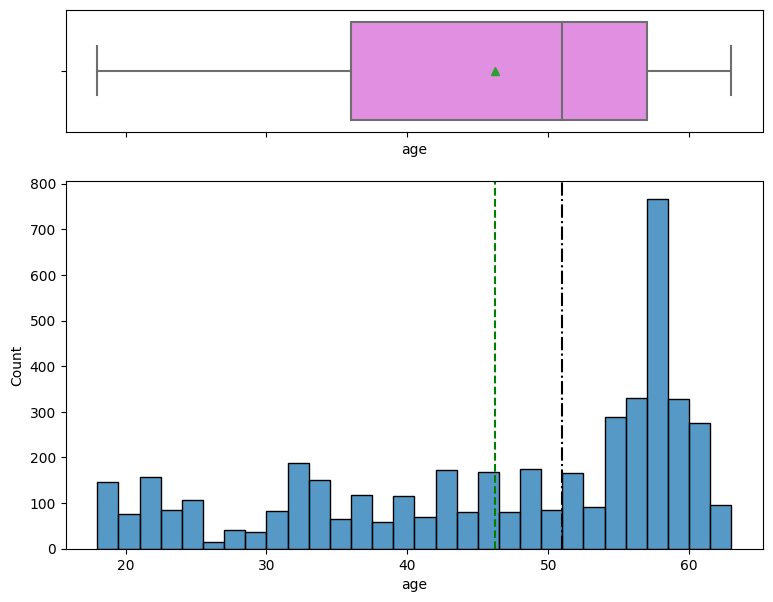

In [214]:
histbox(data,'age',bin = 30)

Observations:
* Mean age is around 56
* The data is very skewed to the left, majority of the people are above age 54
* There are no outliers in age

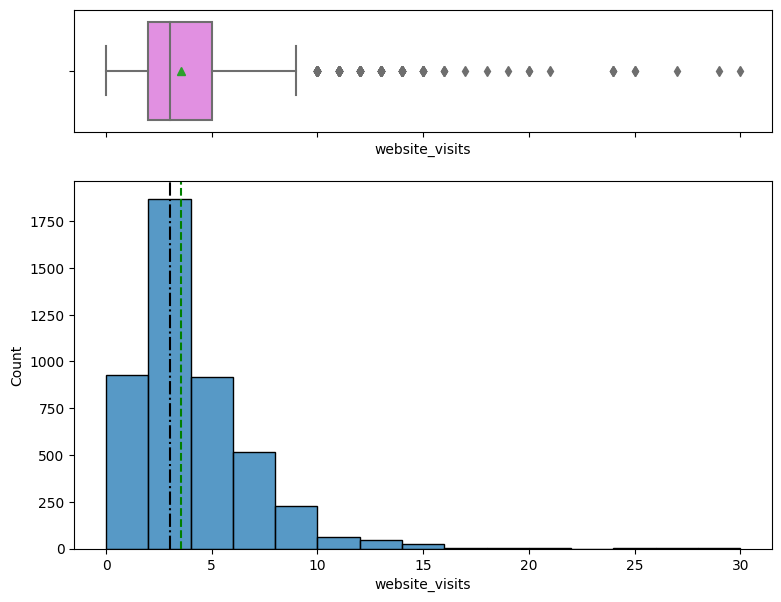

In [215]:
histbox(data,'website_visits',bin = 15)

Observations:
* The average number of visits to the website is 3.57 times
* The data is skewed to the right
* There are many outliers above upper Inter Quartile Range

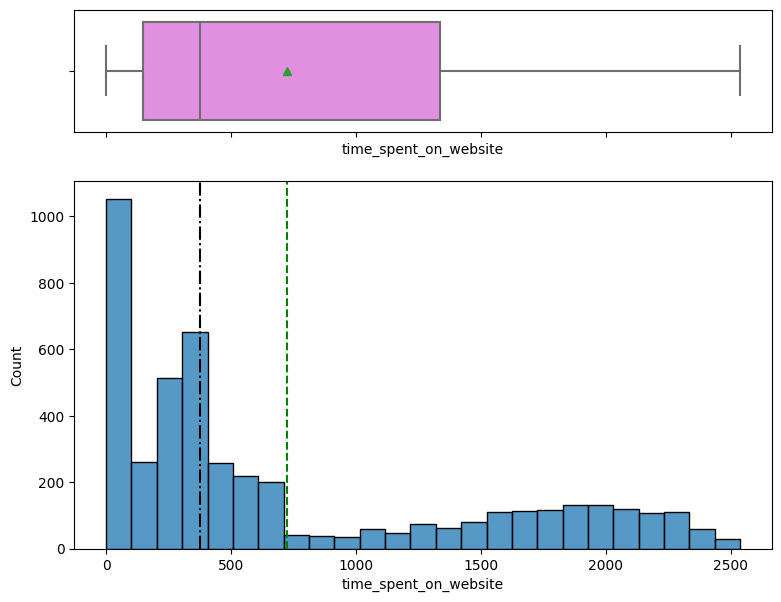

In [216]:
histbox(data,'time_spent_on_website', bin = 25)

In [217]:
#Studying into why the first bar has such high count
data['time_spent_on_website'].value_counts()[:100]

0      174
1       71
83      20
65      19
49      17
76      17
86      16
367     16
64      16
78      15
72      15
71      14
343     14
75      14
85      14
55      14
73      14
296     14
88      13
42      13
59      13
48      13
40      12
81      12
352     12
69      12
66      12
57      12
74      12
58      11
325     11
317     11
357     11
91      11
314     11
60      11
51      11
307     10
348     10
30      10
401     10
90      10
93      10
62      10
341     10
80      10
63      10
358     10
337     10
99      10
82      10
300     10
390      9
412      9
207      9
68       9
41       9
26       9
84       9
288      9
391      9
342      9
299      9
318      9
419      9
354      9
308      9
283      9
61       9
362      9
378      9
44       9
330      9
239      9
284      9
301      8
349      8
77       8
387      8
380      8
47       8
361      8
274      8
46       8
53       8
304      8
70       8
43       8
268      8
359      8
333      8

In [218]:
#It seems like most of the leads spent less than 2 minutes on the website.
#Check how many leads spent 120 seconds or less time on the website
data.loc[data['time_spent_on_website'] <= 120].shape[0]

1092

Observations:
* The median time spent on the website is 0 seconds. The plot shows a very high count on the first bar because most people spent less than 2 minutes on the website
* The average number of time spent on the website is 724 seconds, approximately 12.07 minutes
* The data is also skewed to the right, with no outliers


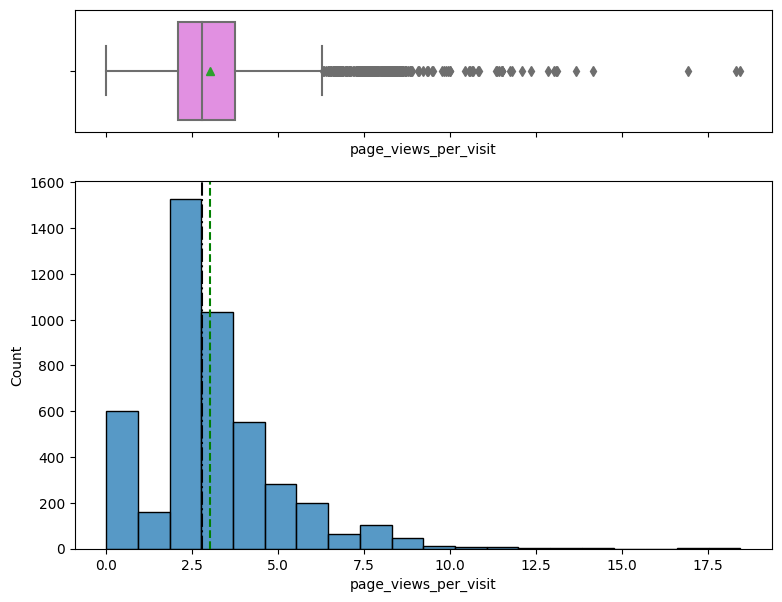

In [219]:
histbox(data,'page_views_per_visit',bin = 20)

Observations:
* On average, viewed 3 pages per visit
* The data is skewed to the right, with many outliers to the right.

###Categorical Variables

####Creating Function

In [220]:
def labeled_countplot(data,feature,perc = False, n = None):
  total = len(data[feature])
  count = data[feature].nunique()

  #Changing size of the plot
  if n is None:
    plt.figure(figsize = (count + 1, 5)) #if n is not specified, then the size of the chart will be the according to number of features
  else:
    plt.figure(figsize = (n + 1, 5))

  #Rotate the x labels
  plt.xticks(rotation = 90)

  #Create the countplot and assigning it to object
  ax = sns.countplot(data = data,
                     x = feature,
                     palette = "Paired",
                     order = data[feature].value_counts().index[:n].sort_values(),)

  #Creating the labels
  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(100*p.get_height()/total) #Gets the percentage value of the height
    else:
      label = p.get_height() # Just get the height without percentage

    #Getting coordinates for the annotation
    x = p.get_x() + p.get_width()/2
    y = p.get_height()

    #Coding the annotations
    ax.annotate(label,(x,y),
                ha = "center",
                va = "center",
                size = 12,
                xytext = (0,5),
                textcoords = "offset points")

  plt.show()

####Studying each Feature

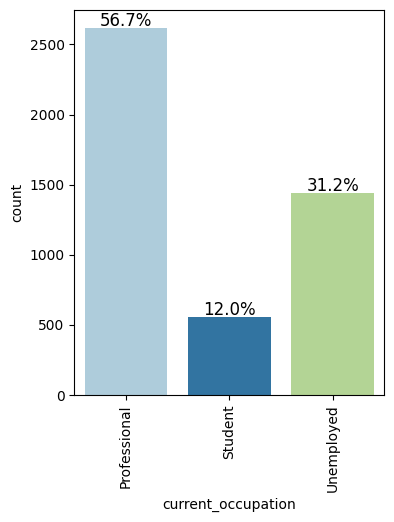

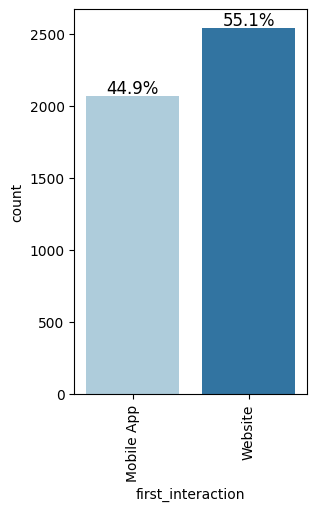

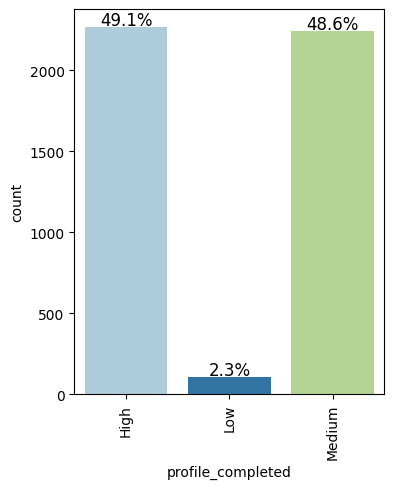

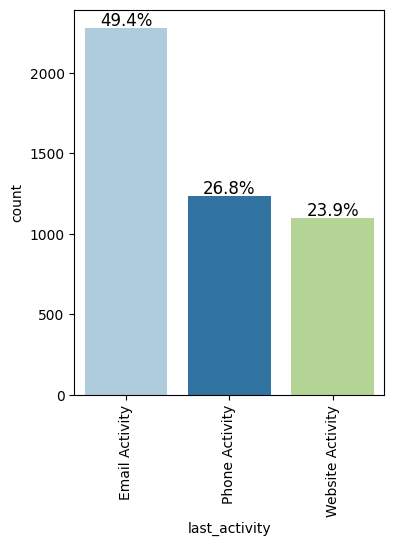

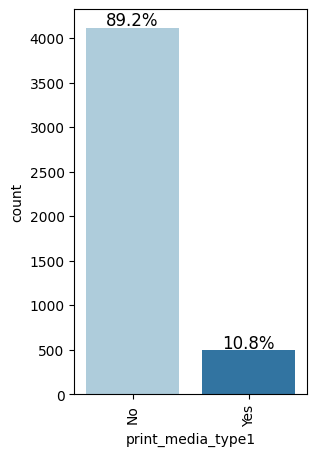

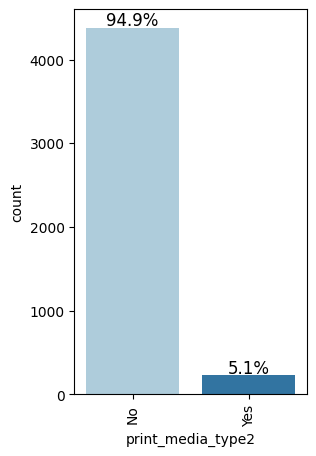

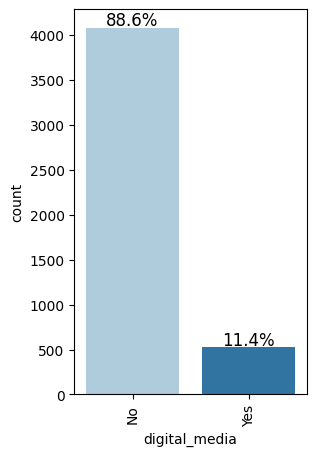

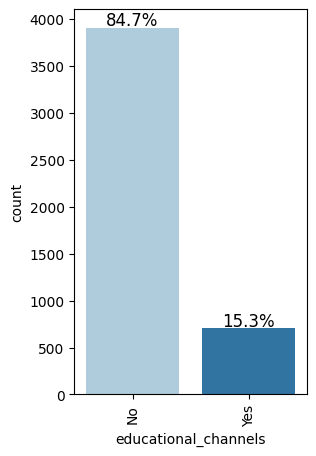

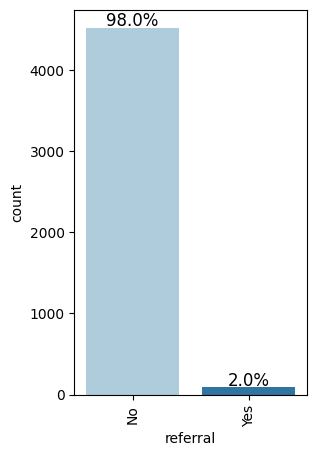

In [221]:
#Creating a list of names of the categorical variables
cat = cat_cols.to_list()

#Remove the ID from the study as it is not constructive for the analysis
cat.remove('ID')

#Plotting the countplot for each categorical feature
for features in cat:
  labeled_countplot(data,features,perc = True)

  #For separating the plots from each other
  print(' ')

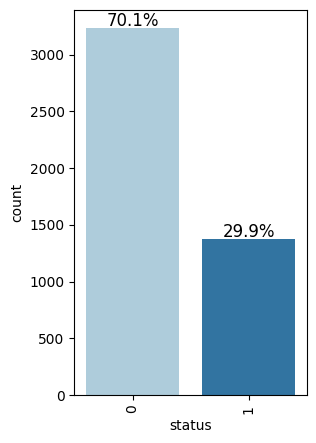

In [222]:
#Finally, to study the dependent variable
labeled_countplot(data,'status',perc = True)

Observations:
* 56.7% of the leads are working professionals
* More first interactions are from website
* Only a very small percentage of the leads will not fill up their profile.
* Many of the leads’ last activities is email
* The percentage of leads that had heard about ExtraaLearn is quite low from each channel, with the highest percentage beig 15.3% from educational channels.
* Only 2% of leads had heard about ExtraaLearn through reference
*29.9% of the leads had converted to a paid customer.


##Bivariate Analysis
- Key meaningful observations on individual variables and the relationship between variables

####Numerical Variable Overview

<Axes: >

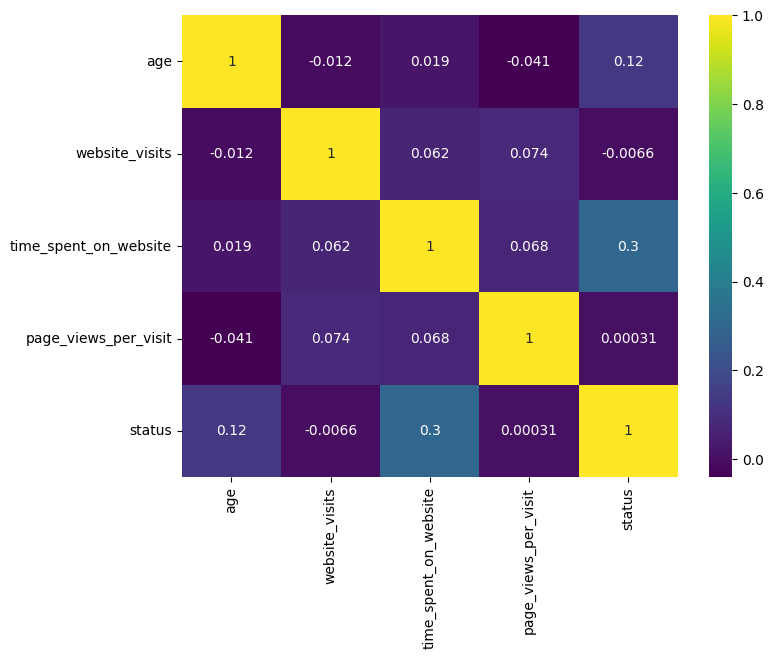

In [223]:
#Figure size
plt.figure(figsize = (8,6))

#Plotting the heatmap
sns.heatmap(data.corr(), annot = True, cmap = 'viridis')

Observations:
* There is some positive correlation between the time a lead had spent on the website and whether they converted into paid customer.
* There is also a weak positive correlation between age and status.

####**Questions to Investigate**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

####Creating function for barplot

In [224]:
def labeled_barplot(data,xf,yf,perc = True, n = None):
  total = len(data[yf])
  count = data[yf].nunique()

  #Changing size of the plot
  if n is None:
      plt.figure(figsize = (6, count + 1)) #if n is not specified, then the size of the chart will be the according to number of features
  else:
    plt.figure(figsize = (n + 1, 5))

  #Create the countplot and assigning it to object
  ax = sns.barplot(data = data,
            y = yf,
            x = xf,
            ci = None,
            order = data.groupby([yf])[xf].mean().sort_values(ascending = False).index); #This allows us to sort the graph in descending order of the mean

  #Creating the labels
  for p in ax.patches:
    if perc == True:
      label = "{:.1f}%".format(100*p.get_width()) #Gets the percentage value of the height
    else:
      label = "{:.2f}".format(p.get_width()) # Just get the height without percentage

    #Getting coordinates for the annotation
    x = p.get_width() + 0.06
    y = p.get_y() + p.get_height()/2

    #Coding the annotations
    ax.annotate(label,(x,y),
                ha = "center",
                va = "center",
                size = 12,
                xytext = (0,5),
                textcoords = "offset points")

  #Setting the x axis limits
  ax.set(xlim = (0,data[xf].max()))
  plt.show()

####Occupation vs Status

current_occupation  status
Professional        0         0.644878
                    1         0.355122
Student             0         0.882883
                    1         0.117117
Unemployed          0         0.734212
                    1         0.265788
Name: status, dtype: float64


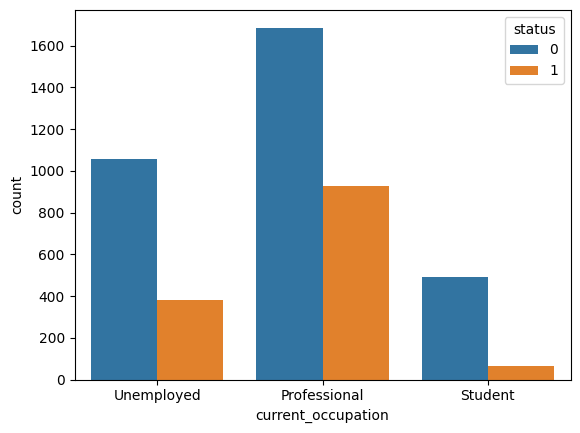

In [225]:
#Finding the percentage of leads that had converted from each occupation
percent = data.groupby(['current_occupation'])['status'].value_counts(1)
print(percent)

#Visualizing the frequency of conversion from each occupation
sns.countplot(data = data, x = 'current_occupation', hue = 'status')
plt.show()

<Axes: xlabel='current_occupation', ylabel='age'>

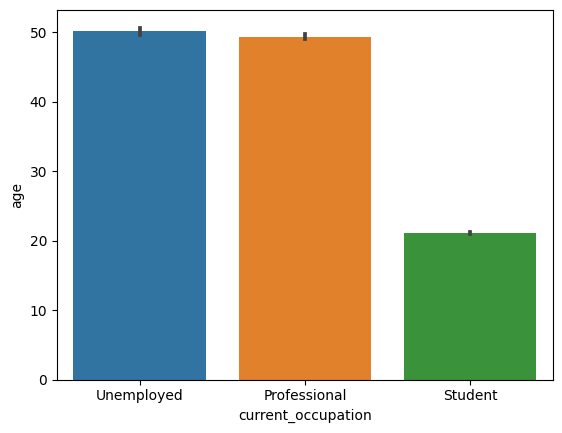

In [226]:
#Studying the relationship between age and current_occupation
sns.barplot(data = same_data, x = 'current_occupation', y = 'age')

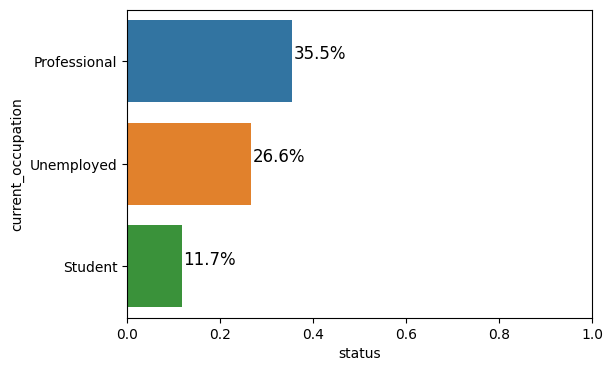

In [227]:
#To study the percentage conversion of each occupation
labeled_barplot(data,'status','current_occupation')

Observations:
* Majority of the leads were made up of working professionals
* Working professionals have the highest conversion rate into paying customers
* 35.5% of leads that were working professionals had converted
* 26.6% of unemployed leads had converted
* 11.7% of students had had converted
* Since employed and unemployed leads are more likely to convert, and their age is higher. This could explain why age had a weak positive correlation of 0.13 with status.

####First Interaction vs Status

first_interaction  status
Mobile App         0         0.894686
                   1         0.105314
Website            0         0.544060
                   1         0.455940
Name: status, dtype: float64
Number of leads who made first interactions on website: 2542
Number of leads who made first interactions on mobile: 2070



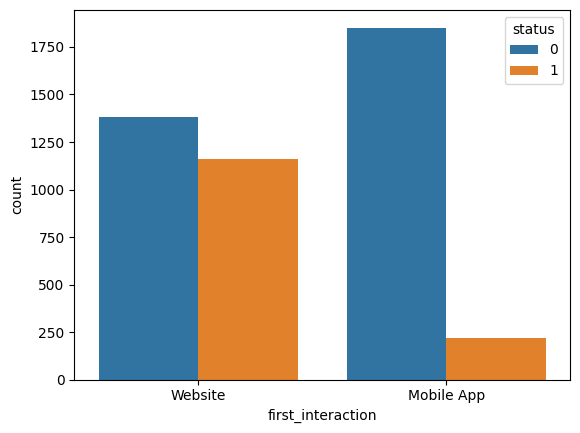

In [228]:
#Finding the percentage of leads that had converted that had converted from each first interaction types
percent = data.groupby(['first_interaction'])['status'].value_counts(1)
print(percent)

#Finding the number of leads had a first interaction through website
website_count = len(data.loc[data['first_interaction'] == 'Website'])
print('Number of leads who made first interactions on website:', website_count)

#Finding the number of leads had a first interaction through mobile applications
mobile_count = len(data.loc[data['first_interaction'] == 'Mobile App'])
print('Number of leads who made first interactions on mobile:', mobile_count)

#Just for separation of prints from from plot
print('')

#Visualizing the frequency of conversion from each first interaction types
sns.countplot(data = data, x = 'first_interaction', hue = 'status')
plt.show()

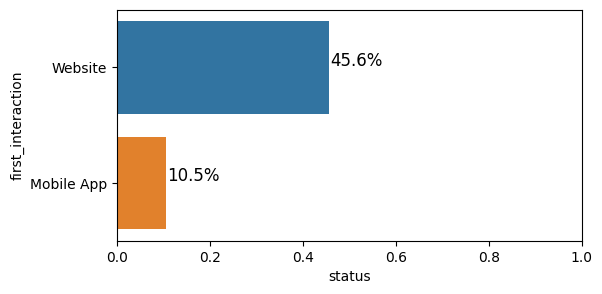

In [229]:
#Visualizing the conversion rate of each first interaction type
labeled_barplot(data,'status','first_interaction')

Observations:
* Website platform is more popular than mobile app platform in attracting leads.
* Website platform established 2542 leads, while mobile platform established 2070 leads.
* Website platform also has a higher success rate at converting leads into paying customers.
* Website platform also has a 45.6% conversion rate, while mobile appllication platform only had a 10.5% conversion rate.


####Last Activity vs Status

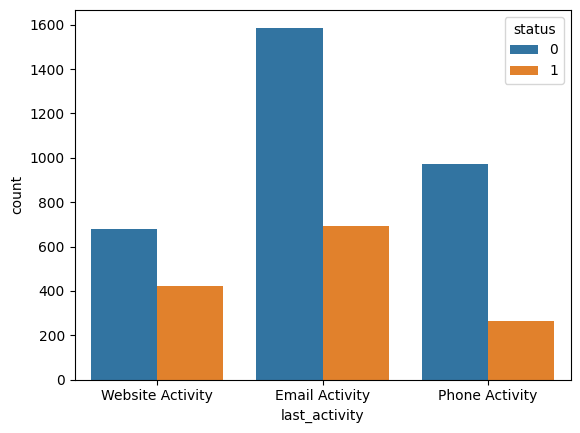

In [230]:
#Studying the conversion rate of each last activity type
sns.countplot(data = data,x = 'last_activity', hue = 'status');

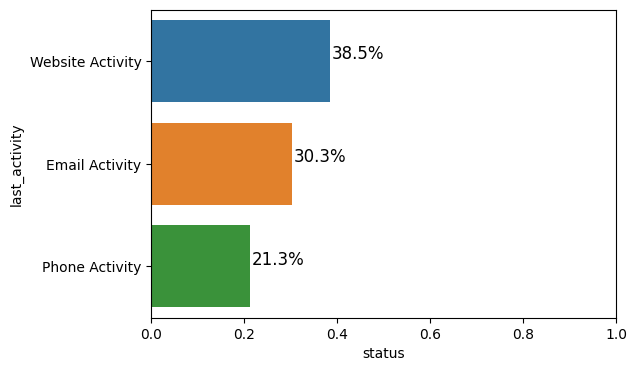

In [231]:
#Visualizing the conversion rate of different last activity types
labeled_barplot(data,'status','last_activity')

<Axes: xlabel='last_activity', ylabel='count'>

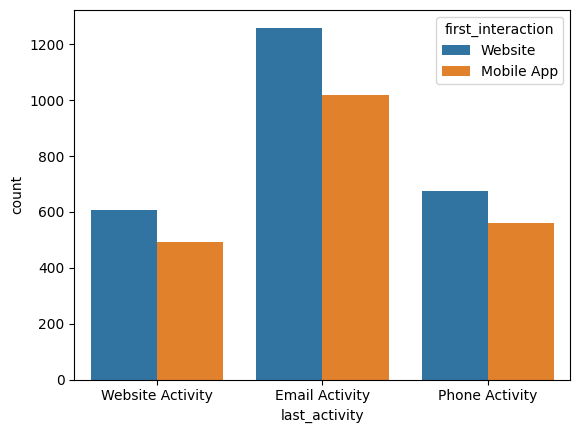

In [232]:
#Studying if people who first interacted on website or mobile apps stay on website
sns.countplot(data = data,x = 'last_activity', hue = 'first_interaction')

Observations:
* Most of the last activities from the leads were email activity.
* There are also most number of successful conversions from leads with last activity via email
* However, the conversion rate for leads with last activities via website is the highest, with 38.5% converstion rate.
* Seems like the first interaction type did not affect the last activity from the leads

####Profile Completed vs Status

High      2264
Medium    2241
Low        107
Name: profile_completed, dtype: int64


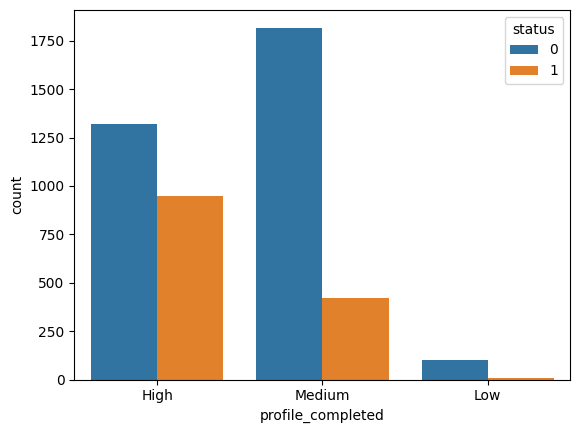

In [233]:
#Counting the total number of leads in each category of profile completion
print(data['profile_completed'].value_counts())

#Studying if the profile completion is correlated to the conversion rate
sns.countplot(data = data, x='profile_completed',hue = 'status')
plt.show()

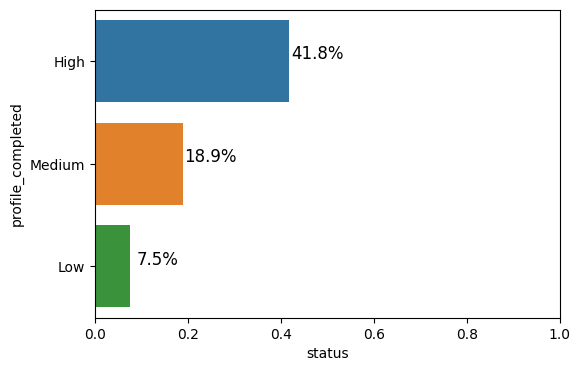

In [234]:
#Visualizing the conversion rate of leads with different profile completion
labeled_barplot(data,'status','profile_completed')

Observations:
* There is almost the same number of leads having high and medium profile completed.
* The conversion rate of leads with high profile completion is the highest, at 41.8%
* Leads with low profile completion only had a 7.5% conversion rate
* Only 2.32% of the leads had a low profile completion.

#### Advertisement vs Status

Visualizing the percentage conversion of the leads that had received different advertising channels

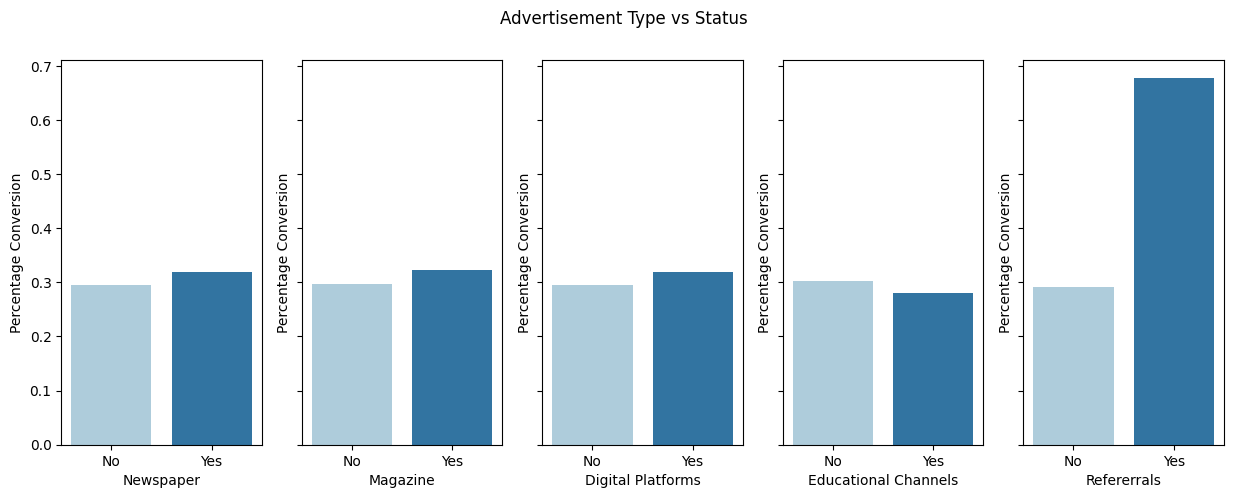

In [235]:
#Defining the subplot shape and size
fig,ax = plt.subplots(1,5,
                      sharey = True,
                      figsize = (15,5))

#Defining the overall plot's title
plt.suptitle('Advertisement Type vs Status')

#Creating the list of advertisement channels
ad = ['print_media_type1',
      'print_media_type2',
      'digital_media',
      'educational_channels',
      'referral']

#Listing a more understandable name for the advertisement channels
adname = ['Newspaper',
          'Magazine',
          'Digital Platforms',
          'Educational Channels',
          'Refererrals']

#Plot each advertisement channel plots as a subplot
for i,j in enumerate(ad):
  ax1 = sns.barplot(data = data,
                      x = j,
                      y = 'status',
                      ci = None,
                      palette = "Paired",
                      order = data.groupby([j])['status'].count().sort_values(ascending = False).index, #Sorting to make sure 'No' is always on the left side of the barplots, and 'Yes' is always on the right side
                      ax = ax[i])
  #Labelling each subplot accordingly
  ax1.set_xlabel(adname[i])
  ax1.set_ylabel('Percentage Conversion')


In [236]:
for i in ad:
  #Finding if each advertisement type affects percentage of conversion
  conversion = data.groupby([i])['status'].value_counts(1, sort = False)
  print(conversion)

  #Total Number of leads from each advertisement type
  count1 = len(data.loc[(data[i] == 'Yes')])
  count2 = len(data.loc[(data[i] == 'No')])
  count3 = count1/(count1+count2)
  print(f'Number of leads exposed to {i} advertisement type: {count1}')
  print(f'Number of leads not exposed to {i} advertisement type: {count2}')
  print(f'Percentage of leads exposed to {i} advertisement type: {round(count3,2)*100}%')
  print('-'*100)

print_media_type1  status
No                 0         0.70401
                   1         0.29599
Yes                0         0.68008
                   1         0.31992
Name: status, dtype: float64
Number of leads exposed to print_media_type1 advertisement type: 497
Number of leads not exposed to print_media_type1 advertisement type: 4115
Percentage of leads exposed to print_media_type1 advertisement type: 11.0%
----------------------------------------------------------------------------------------------------
print_media_type2  status
No                 0         0.702672
                   1         0.297328
Yes                0         0.678112
                   1         0.321888
Name: status, dtype: float64
Number of leads exposed to print_media_type2 advertisement type: 233
Number of leads not exposed to print_media_type2 advertisement type: 4379
Percentage of leads exposed to print_media_type2 advertisement type: 5.0%
------------------------------------------------------

Observations:
* Only educational channel advertisement did not result in an increased conversion rate
* Referral advertisement channel is the most effective in increasing the conversion rate of a lead.
* However, referrals are also the rarest advertisement channel, with only 93 leads that had a referral.

#### Advertisement vs Time Spent on Site

Visualizing the amount of time spent on the website by leads that had received different advertising channels

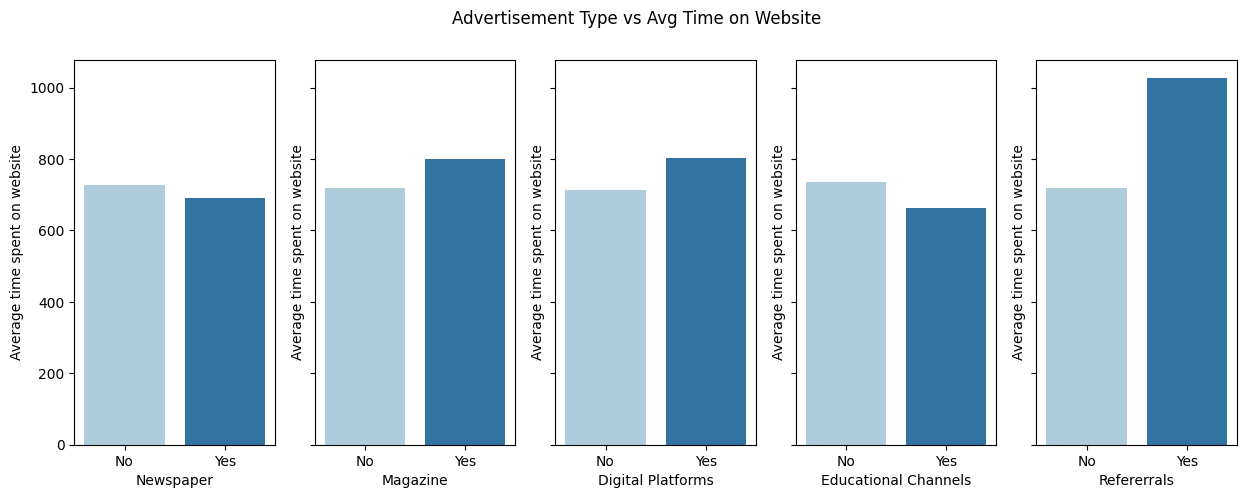

In [237]:
#Defining the subplot shape and size
fig,ax = plt.subplots(1,5,
                      sharey = True,
                      figsize = (15,5))
#Defining the overall plot's title
plt.suptitle('Advertisement Type vs Avg Time on Website')

#Plot each advertisement channel plots as a subplot
for i,j in enumerate(ad):
  ax1 = sns.barplot(data = data,
                      x = j,
                      y = 'time_spent_on_website',
                      ci = None,
                      palette = "Paired",
                      order = data.groupby([j])['time_spent_on_website'].count().sort_values(ascending = False).index, #Making sure the x axis is consistent
                      ax = ax[i])

  #Labelling the subplots
  ax1.set_xlabel(adname[i])
  ax1.set_ylabel('Average time spent on website')

Observations:
* The above data is the average time spent on the website
* Seems like leads who got referred spent more time on the website

# Data Preprocessing

- Missing value treatment - N
- Feature engineering - Convert Dependent variable into categorical
- Outlier detection and treatment - There are outliers, but they are not ridiculous numbers
- Preparing data for modeling - Get Dummies, take out independent variables
- Any other preprocessing steps - N

##Categorical Variables

In [238]:
#Drop the ID variables first
data=data.drop(columns=["ID"])

In [239]:
# Creating dummy variables for the categorical columns
data = pd.get_dummies(data, columns = data.select_dtypes(include = ["object", "category"]).columns.tolist()) #Only apply this function to object and category variables
#drop_first = False has been used here because I wanted to study the columns that would otherwise had been dropped in the important feature study.

In [240]:
#Check what the data looks like now
data.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
1,56,2,83,0.320,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0
2,52,3,330,0.074,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
3,53,4,464,2.057,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
4,23,4,600,16.914,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0


##Removing dependent factor

In [241]:
#Saving the independent variables in x
x = data.drop('status',axis=1)

#Saving dependent variables in y
y = data['status']

# Convert the dependent variable into a categorical data type
y = y.astype('category')

## Splitting Data into Training and Testing data

In [242]:
# Splitting the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state = 1)

In [243]:
# Checking the shape of the train and test data
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)

Shape of Training set :  (3689, 25)
Shape of test set :  (923, 25)


##Data Scaling

In [244]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
x_train_scaled=sc.fit_transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled, columns=x.columns)

# Transform on test data
x_test_scaled=sc.transform(x_test)
x_test_scaled=pd.DataFrame(x_test_scaled, columns=x.columns)

# Building a Decision Tree model

The first thing to be done here is to create a function to review the performance of the Decision Tree that will be generated.

In [245]:
def metrics_score(actual, predicted):
    #This will print ou the precision, recall and f1 score of the model
    print(classification_report(actual, predicted))

    #Plotting the confusion matrix
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    #Visualizing the confusion matrix in the form of a heatmap
    sns.heatmap(cm,
                annot=True,
                fmt='.2f',
                xticklabels=['Not Converted', 'Converted'], #making sure that 0 is labelled as not converted, while 1 is labelled as converted
                yticklabels=['Not Converted', 'Converted'])

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [246]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state = 1)

# Fitting the model
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



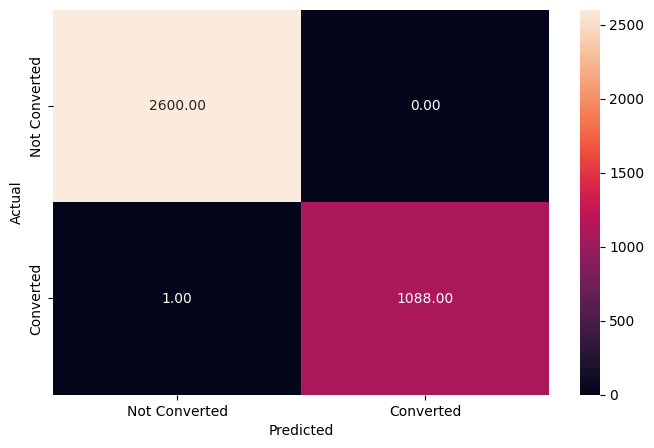

In [247]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(x_train_scaled)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       635
           1       0.73      0.69      0.71       288

    accuracy                           0.82       923
   macro avg       0.80      0.79      0.79       923
weighted avg       0.82      0.82      0.82       923



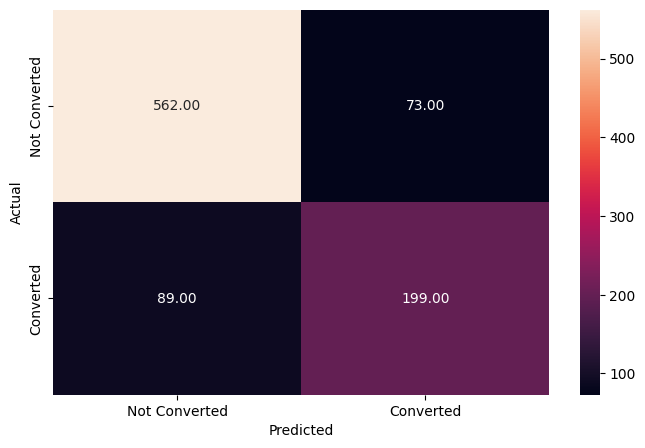

In [248]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(x_test_scaled)
metrics_score(y_test, y_test_pred_dt)

Observations:
* The model works extremely well on te training data, with a 100% recall and precision.
* However, the model only only has a precision of 73% and a recall of 69%. This means that for every predicted conversion, there will be a 27% chance of them that will not convert into a paying customer.
* This means that Extraalearn will be expending resources on these leads that are not going to convert.
* With the model working so well with only the training data, the modelhas been overfitted to the training data, and some optimizing of the decision tree must be done

## Decision Tree Pruning

In [249]:
# Creating the decision tree using a classifier
dtree_estimator = DecisionTreeClassifier(random_state = 1)

# Grid of parameters that we will be iterating with
parameters = {'max_depth': np.arange(2, 7),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]}

# Using the precision of the binary data of '1' as our evaluation score as that is the objective of this study, to allocate resources to leads that will convert
scorer = metrics.make_scorer(precision_score, pos_label = 1)

# Creating the GridSearch function
gridCV = GridSearchCV(estimator = dtree_estimator,
                      param_grid = parameters,
                      scoring = scorer,
                      cv = 10) #Performing 10 fold cross validation on each hyperparameter combination

# Fitting the grid search onto the train data
gridCV = gridCV.fit(x_train_scaled, y_train)

# Set the classifier to the best combination of parameters
dtree_estimator = gridCV.best_estimator_

# Fit the best estimator to the data
dtree_estimator.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=20,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2600
           1       0.82      0.73      0.77      1089

    accuracy                           0.87      3689
   macro avg       0.86      0.83      0.84      3689
weighted avg       0.87      0.87      0.87      3689



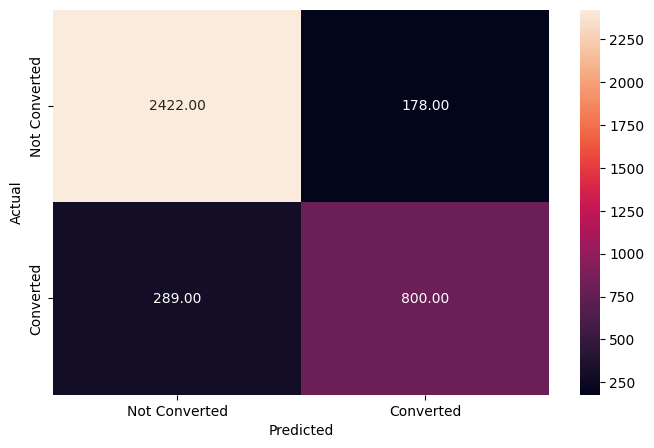

In [250]:
# Checking performance of the best estimator on the training dataset
y_train_pred_dt = dtree_estimator.predict(x_train_scaled)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       635
           1       0.82      0.73      0.77       288

    accuracy                           0.86       923
   macro avg       0.85      0.83      0.84       923
weighted avg       0.86      0.86      0.86       923



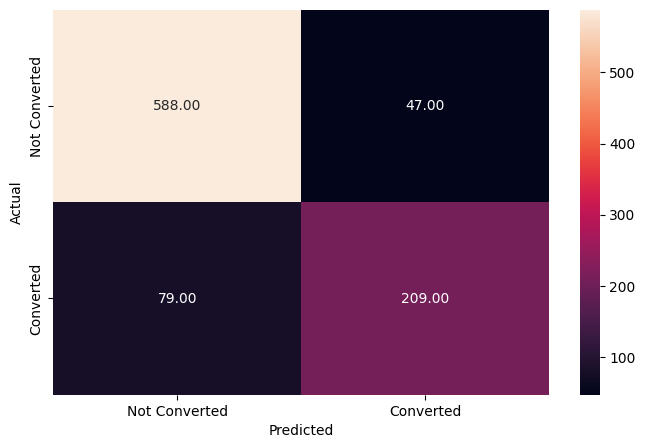

In [251]:
# Checking performance of the best estimated on the testing dataset
y_test_pred_dt = dtree_estimator.predict(x_test_scaled)
metrics_score(y_test, y_test_pred_dt)

Observations:
* Now the model works quite equally well on both training and test data, meaning that lesser overfitting
* It can also be seen that the precision has risen from 73% to 82%, leading to higher likelihood of a lead being correctly predicted to convert into paying customer. This means that Extraalearn will be able to allocate resources more efficiently using the model
* The recall had also risen from 69% to 73%, resulting in more leads that will convert being predicted. This means that Extraalearn will be able to allocate the resources to more leads that will convert to paying customers.

##Studying the Decision Tree

<Axes: xlabel='Importance'>

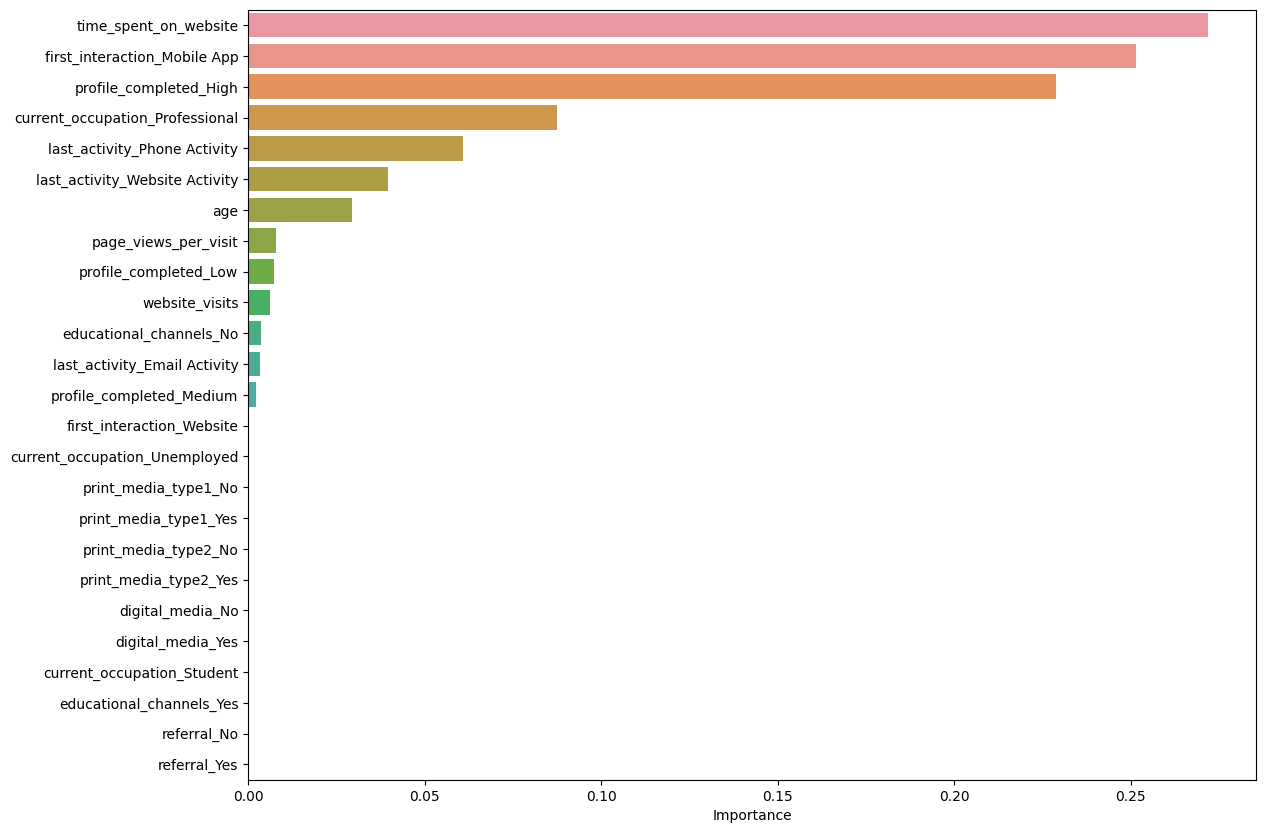

In [252]:
# Retrieving the relative importance of each feature that was used in the estimator
importances = dtree_estimator.feature_importances_

#Retrieving the name of the features
columns = x.columns

#Creating a dataframe using the features and their relative importance
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#Plot a barchart of the relative importance of each feature
plt.figure(figsize = (13, 10))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

Observations:
* According to the new decision tree model, only 13 out of 25 features are important. The model had simplified the problem by tuning out the other variables. This could mean that the important patterns from other variables are excluded from the prediction.
* From the barchart, it can be seen that spenindg more time on the website, using mobile applications for first interactions, and having a high profile completion are significantly more important in predicting if a lead will convert into a paying customer.

# Building a Random Forest model

In [253]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state = 1)

# Fitting the model
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2600
           1       1.00      1.00      1.00      1089

    accuracy                           1.00      3689
   macro avg       1.00      1.00      1.00      3689
weighted avg       1.00      1.00      1.00      3689



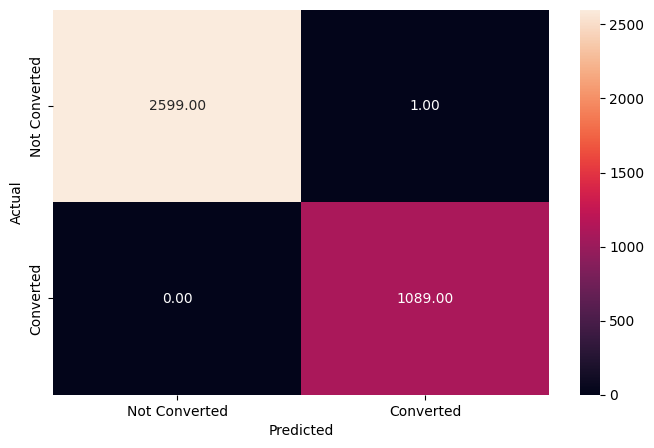

In [254]:
# Checking model performance on the training dataset
y_test_pred_rf = rf.predict(x_train_scaled)
metrics_score(y_train, y_test_pred_rf)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       635
           1       0.81      0.69      0.75       288

    accuracy                           0.85       923
   macro avg       0.84      0.81      0.82       923
weighted avg       0.85      0.85      0.85       923



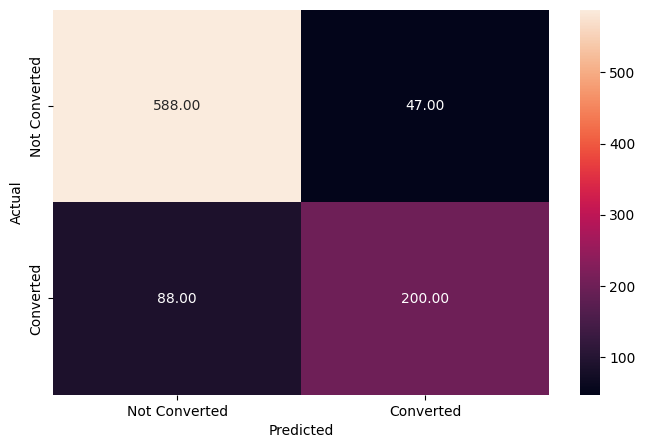

In [255]:
# Checking model performance on the testing data
y_pred_test_rf = rf.predict(x_test_scaled)
metrics_score(y_test, y_pred_test_rf)

Observations:
* The model has a 19% chance of predicting that a lead will convert, when the lead will not be converting.
* However, it has a lower recall of 69%, so 31% of of the leads that will convert will not bt correctly predicted out.
* The model is working really well with the training data again, but not so well on the test data. This is a sign of overfitting again, and so pruning must be done to reduce it.

## Random Forest Pruning

In [256]:
# Choosing the Classifier as the estimator
rf_estimator_tuned = RandomForestClassifier(random_state = 1)

# List of parameters that will be used for the gridsearch
params_rf = {'criterion': ['entropy'],
             "n_estimators": [100, 250, 500], #No. of trees
             "min_samples_leaf": np.arange(1,5,1),
             "max_features": [0.7, 0.9, 'auto']} #Min. samples in each leaf

# Using precision score for class 1
scorer = metrics.make_scorer(precision_score, pos_label = 1)

# Run the grid search function
grid_obj = GridSearchCV(estimator = rf_estimator_tuned,
                        param_grid = params_rf,
                        scoring = scorer,
                        cv = 5)

# Fit the gridsearch onto the training data
grid_obj = grid_obj.fit(x_train_scaled, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best estimator to the data
rf_estimator_tuned.fit(x_train_scaled, y_train)

RandomForestClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=4, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      2600
           1       0.85      0.79      0.82      1089

    accuracy                           0.90      3689
   macro avg       0.88      0.87      0.87      3689
weighted avg       0.90      0.90      0.90      3689



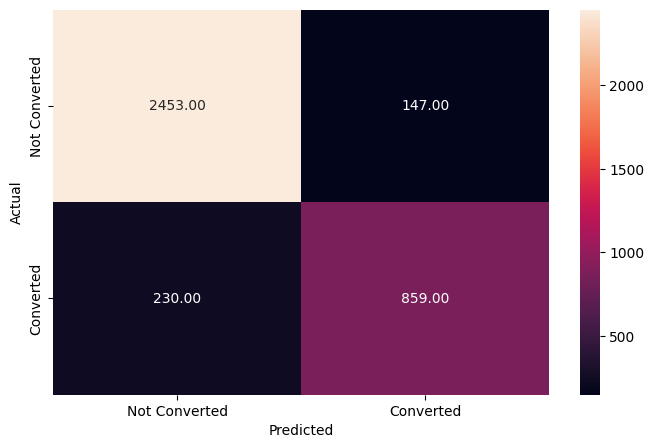

In [258]:
# Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train_scaled)
metrics_score(y_train, y_pred_train_rf_tuned)

              precision    recall  f1-score   support

           0       0.88      0.94      0.90       635
           1       0.83      0.71      0.77       288

    accuracy                           0.86       923
   macro avg       0.85      0.82      0.84       923
weighted avg       0.86      0.86      0.86       923



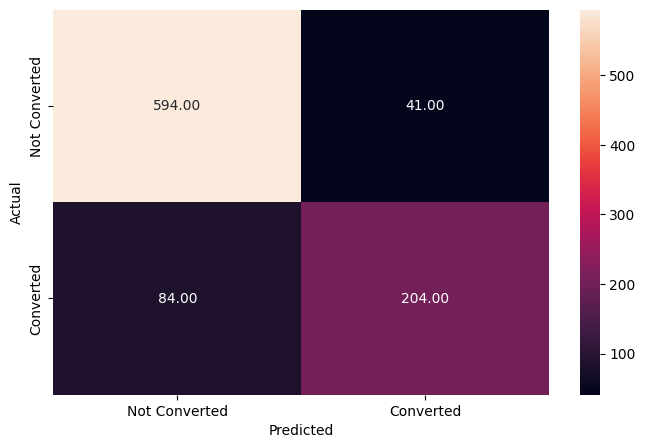

In [259]:
# Checking performance on the test data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test_scaled)
metrics_score(y_test, y_pred_test_rf_tuned)

Observations:
* After pruning, the random forest is peforming slightly better with higher levels of precision and recall.
* Overfitting has been reduced as the performance is closer between training and testing datasets.
* However, some overfitting still persists as the model performs slightly better on the testing data set

## Studying the Random Forest

<Axes: xlabel='Importance'>

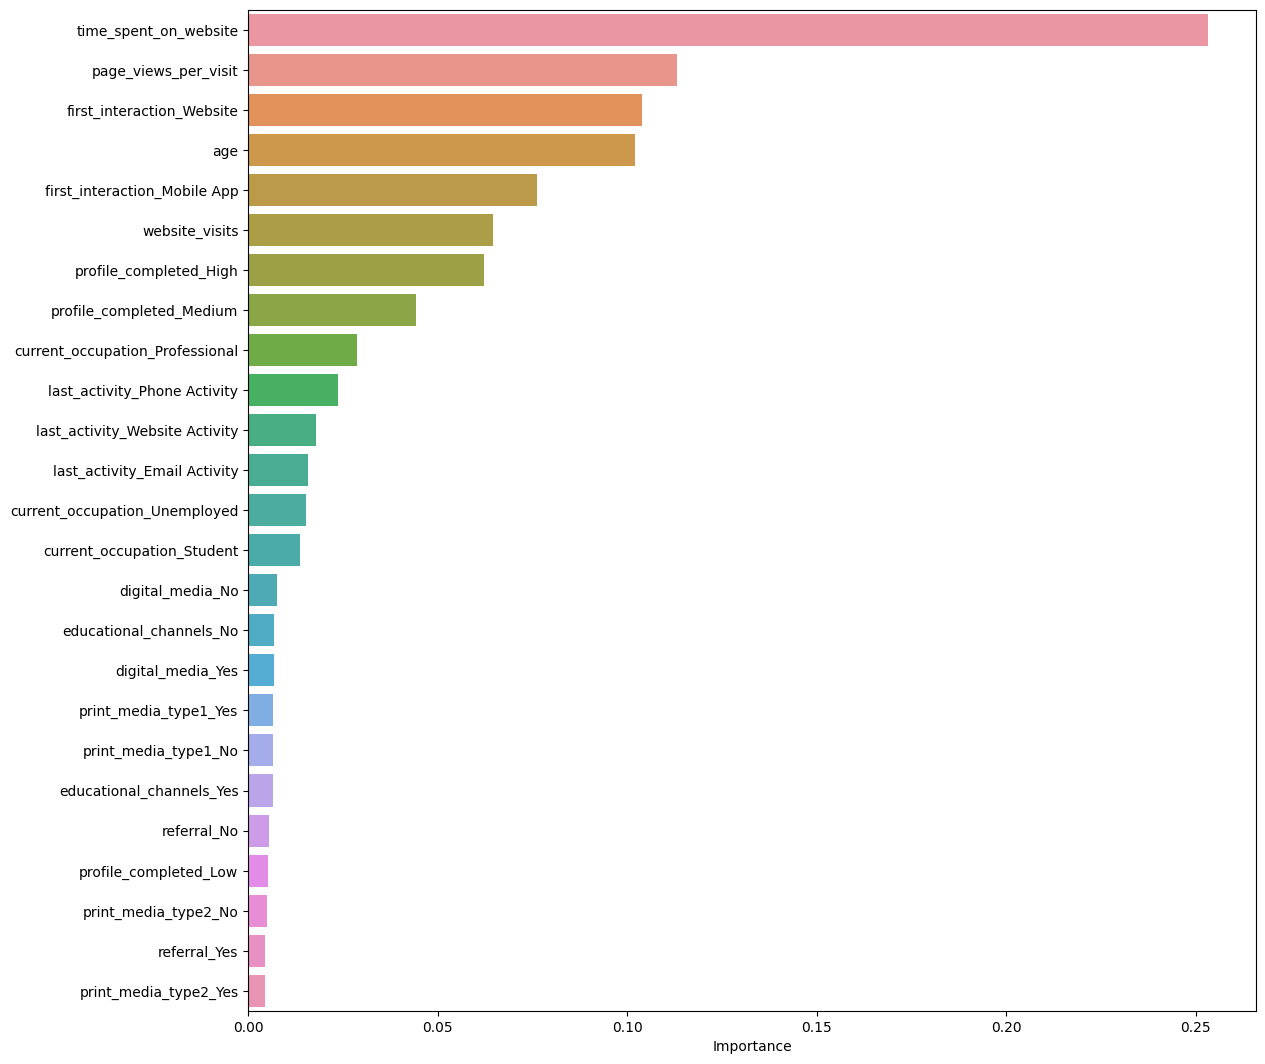

In [260]:
# Retrieving the relative importance of each feature that was used in the estimator
importances = rf.feature_importances_

#Retrieving the name of the features
columns = x.columns

#Creating a dataframe using the features and their relative importance
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

#Plot a barchart of the relative importance of each feature
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

Observations:
* The time spent on the website is still the most important feature to consider.
* High profile completion is now the 7th most important feature, instead of being significantly important in Decision Tree
* First interaction on the mobile application became 5th most important feature, instead of being 2nd most important feature in Decision Tree
* All other variables' patterns are now taken into consideration
* Other important features are Page_views_per_visit, first_interaction_website, age, website_visits, profile_completion_medium, current_occupation_professional


# Actionable Insights and Recommendations

##Findings from EDA:##


* **The average conversion rate is 30%.** - Therefore, if an independent variable is able to present an average conversion rate that is higher than 30%, it will be recommended to focus more resources there.

*	**Time spent on website has a high positive correlation of 0.3 to status.** - This means that more time a lead spends on the website, the higher chance that lead will convert into a paying customer.

* **Leads who spent more time on the website has very high conversion rate of 45.6%.** - On the contrary, Leads who spent more time on mobile app has much lower conversion rate, only 10.5%.

*	**Age has 0.13 correlation to age.** - See if age has got something to do with the working professionals.

*	**Working professionals are the most common lead, and highest percentage conversion (35.5%)**

*	**Last activity being on website has highest conversion rate of 38.5%.** -  Email is the most common last activity, and the conversion rate is 30.3%. So it is not recommended to set aside leads with email last activities.

*	**High Profile completion has 41.8% conversion rate.**
o	Recommended to focus attention on these leads, ignore low profile completion

*	**Leads that were referred have the highest conversion rate of 67.7%** -	Focus more attention on leads with referrals

*	**Every other kind of advertisement improved the conversion rate except educational channel advertisements** - Recommended to Stop educational channel advertisements, continue others.


##Findings from Decision Tree:##

**82% precision** – Extraalearn will be able to efficiently spend their resources on leads that has a 82% likelihood to convert.


**73% recall** – Extraalearn will likely be able to catch 73% of the leads that will be converting, and allocate more resources to them.

From the Decision Tree Model, the **following 3 features are significantly more important** in predicting if a lead will convert into a paying customer:
*	spending more time on the website,
*	using mobile applications for first interactions
*	having a high profile completion



However, other features have been tuned out, oversimplifying the model as it ignores the patterns from other variables.

## Findings from Random Forest:

**83% precision** - Extraalearn will be able to efficiently spend their resources on leads that has a 83% likelihood to convert.



**71% recall** – Extraalearn will likely be able to catch 71% of the leads that will be converting and allocate more resources to them.

From the model,
* **Time spent on the website is the most important feature**, and is more than twice as important as the next most important feature.
* **Number of pages viewed per visit** is the 2nd most important feature to consider. Although it is intuitive to group page_views_per_visit and time_spent_on_website together, they are found not to be positively correlated during the bivariate analysis. Hence these 2 features should both be taken into consideration for analysis.
* **Leads who had first interacted with Extraalearn via the website** is important.
* **Age is important** and it is also found to be slightly positively correlated with conversion rate.


The model takes all other variables into consideration, in contrast to the Decision Tree model.

##Recommendations:

1. If an independent variable is able to present an average conversion rate that is higher than 30%, it will be recommended to focus and allocate more resources on those features.
* Help leads who spends more **time on the website (45.6% conversion)**
* Leads with **last activity on websites (38.5%)**, maintain resource expenditure on leads with **last activity on emails (30.5%)**, and spend lesser resources on leads with last activity on mobile apps.
* Help leads that are **working professionals(35.5%)**
* Leads with **high profile completion (41.8%)**, and allocate less to leads with low profile completion
* Help **leads that had gotten referrals(67.7%)**

2. **Stop running advertisements through educational channels**, as it was found that this is the only advertisement channel that did not positively impacted the conversion rate. All other advertisement channels have approximately 30% conversion rate.

3. **Utilize the Random Forest to predict leads that will convert.**
* The model has almost similar performance to the decision tree model. However, some overfitting still exist in the model and it can be improved with more samples in the future, improving the precision, recall, and ultimately the efficieny of the resource allocation.
* Extraalearn will be able to efficiently spend their resources on leads that has a 82% likelihood to convert.
* Extraalearn will likely be able to catch 71% of the leads that will be converting, and allocate more resources to them.